# Análise de tempo de execução

Uma maneira simplificada de analisar o tempo de execução de um algoritmo é contar o número de operações realizadas.

**Problema (Exp):**

- Entrada: Dois inteiros $n$ e $p \geq 0$
- Saída: $n^p$

In [30]:
def potencia(n, p):
    r = 1 # 2 operacoes (acessar 1, =)
    i = 0 # 2 operacoes (acessar 0, =)
    while(i < p): # 3 operacao (ler i, ler p e comparar)
        r = r*n # 4 operacoes (ler r, ler n, =, *)
        i = i+1 # 3 operacoes (ler i, +, acessar 1,=)
    return r

In [31]:
potencia(2,4)

16

O while roda para i=0, 1, 2,..., p-1.

Ou seja, 
- i<p: $p+1$ vezes - $3(p+1)$ operações
- r = r*n: $p$ vezes - $4p$ operações
- i = i+1: $p$ vezes - $4p$ operações

Somando com as operações de r=1 e i=0, o número de operações total é
$$
4+3(p+1)+4p+4p = 11p+7.
$$

Vamos conferir:

In [32]:
def potenciaOperacoes(n, p):
    r = 1 # 2 operacoes (acessar 1, =)
    i = 0 # 2 operacoes (acessar 0, =)
    op = 7
    while(i < p): # 3 operacao (ler i, ler p e comparar)
        r = r*n # 4 operacoes (ler r, ler n, =, *)
        i = i+1 # 4 operacoes (ler i, +, acessar 1, =)
        op += 11
    print('Numero de operacoes '+str(op))
    print(str(11*p+7))
    return r

In [33]:
potenciaOperacoes(2,30)

Numero de operacoes 337
337


1073741824

In [36]:
def potencia2(n, p):
    r = 1 # 2 operacoes (acessar 1, =)
    op = 5
    while(p > 0): # 3 operacao (ler i, ler p e comparar)
        r = r*n # 4 operacoes (ler r, ler n, =, *)
        p = p-1 # 4 operacoes (ler p, -, 1, =)
        op += 11
    print(op)
    return r

In [37]:
potencia2(2,30)

335


1073741824

Temos apenas 2 operações a menos!

*Exercício:* É possível dizer que se rodarmos na mesma máquina e na mesma entrada, o primeiro método vai demorar mais do que o segundo (mesmo que por uma quantidade insignificante de tempo)? 

*Exercício:* Qual o tamanho da entrada para o **Problema (Exp)**? O algoritmo em potencia(n,p) é considerado eficiente (ou seja, o número de operações é limitado por um polinômio no tamanho da entrada)?


Quando analisamos algoritmos, consideramos apenas o termo mais significativo no número de operações e ignoramos constantes multiplicativas.

Por exemplo, para $11p+7$, estamos apenas interessados no $p$.

Assim, ao compararmos $11p+7$ e $11p+5$, consideramos que os tempos de execução são equivalentes.

Isso quer dizer que nesse tipo de análise um algoritmo que roda em tempo $p$ e um que roda em tempo $11p$ são considerados igualmente eficientes. 

Isso parece muito injusto. O que você acha?

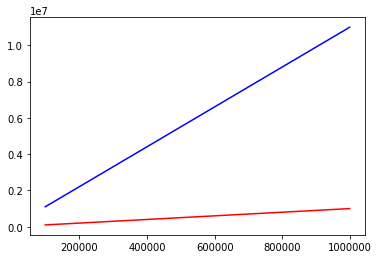

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(100000,1000000,1000)
y1 = x
y2 = 11*x
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')

Vamos ver agora um outro método. 

Assuma que $p = 2^k$ para algum $k$ e $p\geq 1$:

In [41]:
def potencia3(n,p):
    r = n
    i = 1
    op = 7
    while(i<p):
        r = r*r
        i = i*2
        op += 11
    print(op)
    return r

Vamos comparar como potencia2:

In [42]:
potencia3(2,32)
potencia2(2,32)

62
357


4294967296

Quantas vezes o laço roda?

$i$ tem valores $1$, $2$, $4$,...$2^k = p$ 

In [43]:
def potencia3Laco(n,p):
    r = n
    i = 1
    laco = 0
    while(i<p):
        r = r*r
        i = i*2
        laco = laco+1
        print(i)
    print('laco='+str(laco))
    return r

In [44]:
potencia3Laco(2,32)

2
4
8
16
32
laco=5


4294967296

$32=2^k=p$ e note que $k = \lg p$. (Usamos $\lg$ para abreviar $\log_2$.)
 
Ou seja, o laço roda $k-1$ vezes. 

O número total de operações é
$$
7 + 11(k-1) = 11\lg p - 4
$$

Como isso se compara com potencia2?

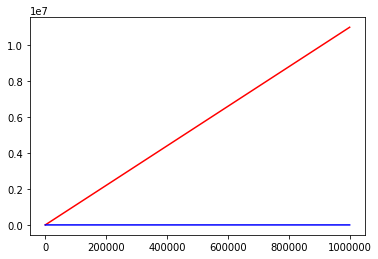

In [55]:
x = np.arange(10,1000000,100)
y1 = 11*x+5
y2 = 11*np.log2(x)-4
plt.plot(x,y1,'r')
plt.plot(x,y2,'b')

Como você pode ver a diferença é muito mais drástica!

# Funções assintóticas

Quanto consideramos uma função f <= uma função g?

Bom, já dissemos acima que consideramos apenas o termo mais significativo no número de operações e ignoramos constantes multiplicativas.

Como formalizar essa idéia? Vamos considerar funções $f(n)$ e $g(n)$.

Tentativa 1) Existe uma constante $A$ tal que $f(n) \leq A\cdot g(n)$

Funciona?

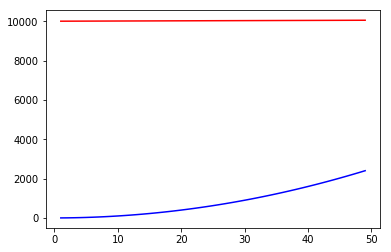

In [92]:
x = np.arange(1,50)
f = x+10000;
g = x*x;
plt.plot(x,f,'r')
plt.plot(x,g,'b')

Tentativa 2) Existem constantes $A$ e $N_0$ tais que $f(n) \leq A\cdot g(n)$ para todo $n\geq N_0$.

## Definição: $O$ ("<=" para funções)
Dizemos que uma função $f(n)$ é $O(g(n))$ se  

 Existem constantes  $A$ e $N_0$ tais que  $f(n) \leq A\cdot g(n)$ para todo $n\geq N_0$.

Exemplo: $f(n) = n + 1000$ e $g(n) = n^2$

## Definição: $\Omega$ (">=" para funções)
Dizemos que uma função $f(n)$ é $\Theta(g(n))$ se  

 Existem constantes  $A$ e $N_0$ tais que  $A\cdot g(n) \leq f(n)$ para todo $n\geq N_0$.

## Definição: $\Theta$ ("=" para funções)
Dizemos que uma função $f(n)$ é $\Theta(g(n))$ se  

 Existem constantes  $A$ , $B$ e $N_0$ tais que  $A\cdot g(n) \leq f(n) \leq B\cdot g(n)$ para todo $n\geq N_0$.


In [98]:
def calcula(n):
    if n<=1:
        return 1
    else:
        return calcula(n/2)+calcula(n/2)+calcula(n/2)+3

In [124]:
def calculaOperacoes(n):
    if n<=1:
        return 1;
    else:
        return calculaOperacoes(n/2)+calculaOperacoes(n/2)+calculaOperacoes(n/2)+1

## Funções e relações bastante usadas

# Exercícios